In [61]:
import boto3 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV


#Defining the s3 bucket 
s3 = boto3.resource('s3')
bucket_name = 'christran-data445-bucket'
bucket = s3.Bucket(bucket_name)

#Defining the file in the bucket 
file_key = 'College.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#Read CSV file
college = pd.read_csv(file_content_stream)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [62]:
#B. Changing Private to 1 if 'Yes' and 0 if 'No'
college['Private'] = np.where(college['Private'] == 'Yes', 1, 0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [63]:
#C. Split the data into train (80%) and test (20%)
##Defining
X = college[['Private', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'S.F.Ratio', 'Grad.Rate']]
Y = college['Apps']

#splitting data set at random 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [64]:
#D. Using the MinMaxScaler, transform the input variables in the train and test dataset to 0-1 scale
#transforming using min_max
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

#building a simple linear regression model on the training dataset
lm_md = LinearRegression().fit(X_train, Y_train)

#applying the model on the testing dataset
lm_pred = lm_md.predict(X_test_scaled)
lm_pred

array([ 1966.70494936,    98.97660108,  3521.31371787,  4110.51086488,
        4048.57977756,  1299.7928088 ,  3468.41988163,  4482.92433077,
        3319.71162571,   359.64685269,   528.45521888,   788.53344715,
        1375.17501165,  2497.22631007,  1163.61596114,   932.09021003,
         904.43137275,  3366.93134684,  2838.66461526,  4881.11209609,
        1233.96272702,  -372.74073687,  4234.09864598,  3853.91270076,
        4046.20415568,  3696.18158499,   923.47557395,  -797.34278869,
        1989.98587677,  1292.24878116,   412.27744325,  1584.49396205,
        2709.25215708,  7238.0132535 ,  1509.27849138,  4908.20819161,
         706.68807178,  2391.91841604,  4643.07563442,    42.84941201,
        7581.28966463,  1615.86297544,  2014.77694116,   966.45916414,
        3562.62080334,  5183.05559974,  -443.59818535,  1103.07817561,
         119.80833663, -2894.50534953,  8864.78093393,  2507.92508642,
       11571.60841314,  3989.78674139,   202.21140302,  4654.88328615,
      

In [66]:
mse = np.mean((Y_test - lm_pred)**2)
mse

21153125.995800022

In [ ]:
#The MSE of this model is 21153125.995800022

In [70]:
lambda_to_consider = np.linspace(0.001, 100, num = 100)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
#Using the train dataset, build a ridge regression model as follows
ridge_cv = RidgeCV(alphas = lambda_to_consider, normalize = True, cv = 5).fit(X_train,Y_train)

#Extracting the optimal lambda 
CV_alpha = ridge_cv.alpha_

#Refitting the model with optimal lambda
ridge_md = Ridge(alpha = CV_alpha, normalize = True).fit(X_train,Y_train)
ridge_md.coef_

array([ -515.50213201, 22315.07976316, -3765.50534138,  1782.93063566,
        2886.3309261 ,  1340.70075939,  -990.96539397,  -818.78016693,
        2214.45503005])

In [78]:
#Predicting on test dataset 
ridge_pred = ridge_md.predict(X_test)

#Computing mse 
mse_ridge = np.mean(np.power(Y_test - ridge_pred, 2))
mse_ridge

3202042.356717797

In [80]:
print('The MSE of this model is:', mse_ridge)

The MSE of this model is: 3202042.356717797


In [81]:
#Using the train dataset, build a LASSO regression model as follows
lasso_cv = LassoCV(alphas = lambda_to_consider, normalize = True, cv = 5).fit(X_train,Y_train)

#Extracting the optimal lambda 
CV_alpha = lasso_cv.alpha_

#Refitting the model with optimal lambda
lasso_md = Lasso(alpha = CV_alpha, normalize = True).fit(X_train,Y_train)
lasso_md.coef_

array([ -506.9782583 , 22367.19283151, -3810.38879485,  1779.18303556,
        2887.85068476,  1336.52203956, -1001.43241324,  -822.15732746,
        2206.50651138])

In [82]:
#Predicting on test dataset 
lasso_pred = lasso_md.predict(X_test)

#Computing mse 
mse_lasso = np.mean(np.power(Y_test - lasso_pred, 2))
mse_lasso

3209073.607151721

In [83]:
print('The MSE of this model is:', mse_lasso)

The MSE of this model is: 3209073.607151721


In [86]:
mse_lasso > mse_ridge

True

In [ ]:
#Based on the results of parts e,f,g, I would use Ridge Regression to predict the number of applications that a university reviews
#because it has the lowest MSE. 

In [ ]:
#####################
######### 2 #########
#####################

In [2]:
import boto3 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV


#Defining the s3 bucket 
s3 = boto3.resource('s3')
bucket_name = 'christran-data445-bucket'
bucket = s3.Bucket(bucket_name)

#Defining the file in the bucket 
file_key = 'churn-bigml-80.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#Read CSV file
telecom_train = pd.read_csv(file_content_stream)
telecom_train['Churn'] = np.where(telecom_train['Churn'] == False, 0,1)
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
#Defining the s3 bucket 
s3 = boto3.resource('s3')
bucket_name = 'christran-data445-bucket'
bucket = s3.Bucket(bucket_name)

#Defining the file in the bucket 
file_key = 'churn-bigml-20.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#Read CSV file
telecom_test = pd.read_csv(file_content_stream)
telecom_test['Churn'] = np.where(telecom_test['Churn'] == False, 0,1)
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [4]:
#Change the International plan variable from a categorical variable to a numerical variable. Change Yes to 1 and False to 0 in both data-frames
telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'Yes', 1, 0)

telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'Yes', 1, 0)

In [5]:
#Change the Voice mail plan variable from a categorical variable to a numerical variable. Change Yes to 1 and False to 0 in both data-frames
telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'Yes', 1, 0)

telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'Yes', 1, 0)

In [6]:
#Create a new variable called: total charge as the sum of Total day charge, Total eve charge, Total night charge, and Total intl charge
telecom_train['Total_charge'] = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge']

telecom_test['Total_charge'] = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge']

In [7]:
telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge', 'Customer_service_calls', 'Churn']]

telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge', 'Customer_service_calls', 'Churn']]

In [8]:
X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

In [9]:
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Create a list to store coefficients
coef = list()
#Estimate the optimal lambda for the LASSO model using default values for lambda in scikit-learn and 5-folds.
for i in range(0,1000):
    #splitting the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, stratify = Y)
    
    #Transforming using MinMax
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    
    #Determining the best lambda
    lasso_cv = LassoCV(normalize = True,
                      cv = 5).fit(X_train, Y_train)
    #Extracting the best lambda values
    CV_lambda = lasso_cv.alpha_
    
    lasso_md = Lasso(alpha = CV_lambda, normalize = True).fit(X_train, Y_train)
    
    #storing estimated coefficients 
    coef.append(lasso_md.coef_)
    
#Changing the list to a dataframe 
coef_df = pd.DataFrame(coef)

In [11]:
#Adding column names to df 
coef_df.columns =['Account_length', 'International_plan', 'Voice_mail_plan', 'Total_charge', 'Customer_service_calls']

In [12]:
coef_df.head()

,Account_length,International_plan,Voice_mail_plan,Total_charge,Customer_service_calls
0,0.006307,0.302998,-0.075876,0.416321,0.532889
1,0.024295,0.318740,-0.070598,0.513674,0.487564
2,0.024197,0.349179,-0.071324,0.464540,0.500659
3,0.029801,0.316605,-0.074209,0.507625,0.510336
4,0.008176,0.311805,-0.070103,0.535454,0.466280


In [13]:
count_0 = (coef_df == 0).sum()
count_0

Account_length            248
International_plan          0
Voice_mail_plan             0
Total_charge                0
Customer_service_calls      0
dtype: int64

In [14]:
#We are going to remove Account_length from telecom_train and telecom_test
telecom_train = telecom_train.drop(['Account_length'], axis = 1)
telecom_test = telecom_test.drop(['Account_length'], axis = 1)

In [15]:
telecom_train.head()

,International_plan,Voice_mail_plan,Total_charge,Customer_service_calls,Churn
0,0,1,75.56,1,0
1,0,1,59.24,1,0
2,0,0,62.29,0,0
3,1,0,66.80,2,0
4,1,0,52.09,3,0


In [16]:
from sklearn.metrics import recall_score

In [22]:
######### E #########

from sklearn.model_selection import StratifiedKFold

#defining X and Y 
X = telecom_train[['International_plan', 'Voice_mail_plan',	'Total_charge',	'Customer_service_calls']]
Y = telecom_train['Churn']

#Create lists to store results from models
md1_results = list()
md2_results = list()
md3_results = list()
md4_results = list()

from sklearn.linear_model import LogisticRegression


for i in range(0,100):
    #splitting data into 5 folds 
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)
     
    #transforming data
    scaler = MinMaxScaler()
    X_transformed = scaler.fit_transform(X)
    
    
    #Defining list to store fold results
    md1_fold_results = list()
    md2_fold_results = list()
    md3_fold_results = list()
    md4_fold_results = list()
    
    for train_ix, test_ix in kfold.split(X_transformed,Y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        import statsmodels.formula.api as smf 
        
        #### MODEL 1 #### 
        logit_md1 = LogisticRegression(solver = 'liblinear', penalty = 'l1').fit(X_train, Y_train)
        #Make predictoins 
        md1_pred = logit_md1.predict_proba(X_test)[:,1]
        #changing likelihood to labels 
        md1_labels = np.where(md1_pred < 0.1, 0, 1)
        #storing results 
        md1_fold_results.append(recall_score(Y_test, md1_labels))
        
        
        #### MODEL 2 #### 
        logit_md2 = LogisticRegression(solver = 'liblinear', penalty = 'l2').fit(X_train, Y_train)
        #Make predictoins 
        md2_pred = logit_md2.predict_proba(X_test)[:,1]
        #changing likelihood to labels 
        md2_labels = np.where(md2_pred < 0.1, 0, 1)
        #storing results 
        md2_fold_results.append(recall_score(Y_test, md2_labels))
        
        #### MODEL 3 #### 
        logit_md3 = LogisticRegression(solver = 'saga',penalty = 'l1').fit(X_train, Y_train)
        #Make predictoins 
        md3_pred = logit_md3.predict_proba(X_test)[:,1]
        #changing likelihood to labels 
        md3_labels = np.where(md3_pred < 0.1, 0, 1)
        #storing results 
        md3_fold_results.append(recall_score(Y_test, md3_labels))
        
        #### MODEL 4 #### 
        logit_md4 = LogisticRegression(solver = 'saga',penalty = 'l2').fit(X_train, Y_train)
        #Make predictoins 
        md4_pred = logit_md4.predict_proba(X_test)[:,1]
        #changing likelihood to labels 
        md4_labels = np.where(md4_pred < 0.1, 0, 1)
        #storing results 
        md4_fold_results.append(recall_score(Y_test, md4_labels))
    
    avg1 = np.mean(md1_fold_results)
    md1_results.append(avg1)
    avg2 = np.mean(md2_fold_results)
    md2_results.append(avg2)
    avg3 = np.mean(md3_fold_results)
    md3_results.append(avg3)
    avg4 = np.mean(md4_fold_results)
    md4_results.append(avg4)

In [ ]:
#Create a visualization that shows the recall value for each of the models at each iteration

In [23]:
print('The average recall score of model 1 is: ', np.mean(md1_results))

The average recall score of model 1 is:  0.848078921078921


In [24]:
print('The average recall score of model 2 is: ', np.mean(md2_results))

The average recall score of model 2 is:  0.8759700299700302


In [25]:
print('The average recall score of model 3 is: ', np.mean(md3_results))

The average recall score of model 3 is:  0.8459167499167498


In [26]:
print('The average recall score of model 4 is: ', np.mean(md4_results))

The average recall score of model 4 is:  0.8444472194472195


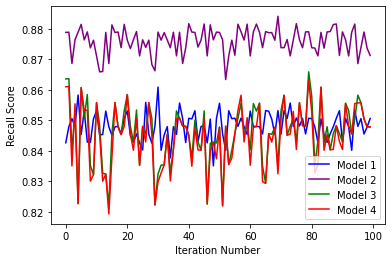

In [120]:
import matplotlib.pyplot as plt

#appending results of each iteration to each model 
iteration = [i for i in range(0,100)]
 
plt.plot(iteration, md1_results, color = 'blue')
plt.plot(iteration, md2_results, color = 'purple')
plt.plot(iteration, md3_results, color = 'green')
plt.plot(iteration, md4_results, color = 'red')
plt.xlabel('Iteration Number')
plt.ylabel('Recall Score')
plt.legend(loc = 'lower right', labels =['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.show()

In [ ]:
#Based on the results, I would use model 2, which has l2 as the penalty for solver = liblinear
#I would use model 3, which has l1 as the penalty for solver = saga

In [186]:
################## G ##################

#defining X and Y 
X_train = telecom_train[['International_plan','Voice_mail_plan','Total_charge','Customer_service_calls']]
Y_train = telecom_train['Churn']
X_test = telecom_test[['International_plan','Voice_mail_plan','Total_charge','Customer_service_calls']]
Y_test = telecom_test['Churn']

#transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [187]:
#Create list to store results 
recall_md2 = list()
recall_md3 = list()

In [188]:
#### MODEL 1 #### 
#Building model 
logit_md2 = LogisticRegression(solver = 'liblinear', penalty = 'l2').fit(X_train, Y_train)
#Make predictoins 
md2_pred = logit_md2.predict_proba(X_test)[:,1]
#changing likelihood to labels 
md2_labels = np.where(md2_pred < 0.1, 0, 1)

In [189]:
recall_md2.append(recall_score(Y_test, md2_labels))

In [190]:
#### MODEL 3 #### 
logit_md3 = LogisticRegression(solver = 'saga',penalty = 'l1').fit(X_train, Y_train)
#Make predictoins 
md3_pred = logit_md3.predict_proba(X_test)[:,1]
#changing likelihood to labels 
md3_labels = np.where(md3_pred < 0.1, 0, 1)

In [191]:
#storing results 
recall_md3.append(recall_score(Y_test, md3_labels))

In [195]:
print('The recall score of model 2 is:', recall_md2)
print('The recall score of model 3 is:', recall_md3)

The recall score of model 2 is: [0.9157894736842105]
The recall score of model 3 is: [0.9052631578947369]


In [ ]:
#Based on the results, I will choose model 2 because it has a higher recall score. 